# 02_modélisation.ipynb

## 🚀 Entraînement des modèles de prédiction de churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import joblib

import os

In [2]:
# 🔹 Chargement des données nettoyées
DATA_PATH = "C:\\Users\\moussa.aouinane\\Documents\\Ecom\\Score Churn Model\\data"
X_train = pd.read_csv(f"{DATA_PATH}\\X_train.csv")
X_test = pd.read_csv(f"{DATA_PATH}\\X_test.csv")
y_train = pd.read_csv(f"{DATA_PATH}\\y_train.csv").values.ravel()
y_test = pd.read_csv(f"{DATA_PATH}\\y_test.csv").values.ravel()

# 🔹 Fonction d'entraînement et d'évaluation

def train_and_test(X_train, y_train, X_test, y_test, classifier, model_name="Modèle"):
    pipeline = Pipeline(steps=[
        ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    print(f"\n📈 \033[1mRésultats TRAIN - {model_name}\033[0m")
    print(classification_report(y_train, y_pred_train))
    disp_train = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train))
    disp_train.plot(cmap='Blues')
    plt.title(f"Matrice de confusion - Entrainement - {model_name}")
    plt.grid(False)
    plt.show()

    print(f"\n📊 \033[1mRésultats TEST - {model_name}\033[0m")
    print(classification_report(y_test, y_pred_test))
    disp_test = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test))
    disp_test.plot(cmap='Oranges')
    plt.title(f"Matrice de confusion - Test - {model_name}")
    plt.grid(False)
    plt.show()

    return pipeline


## 🔁 Entraînement des modèles

================ Logistic Regression ================

📈 Résultats TRAIN - Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3746
           1       0.79      0.54      0.64       758

    accuracy                           0.90      4504
   macro avg       0.85      0.76      0.79      4504
weighted avg       0.89      0.90      0.89      4504



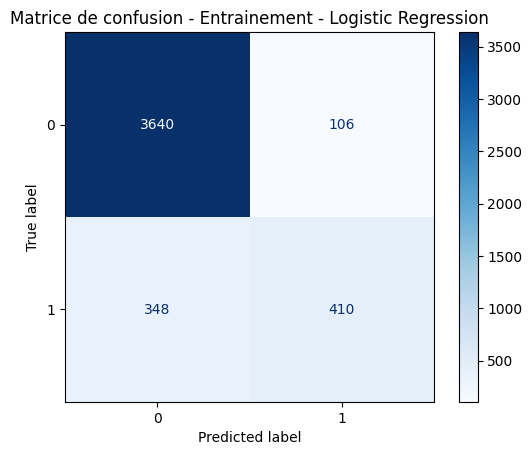


📊 Résultats TEST - Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       936
           1       0.78      0.54      0.64       190

    accuracy                           0.90      1126
   macro avg       0.85      0.75      0.79      1126
weighted avg       0.89      0.90      0.89      1126



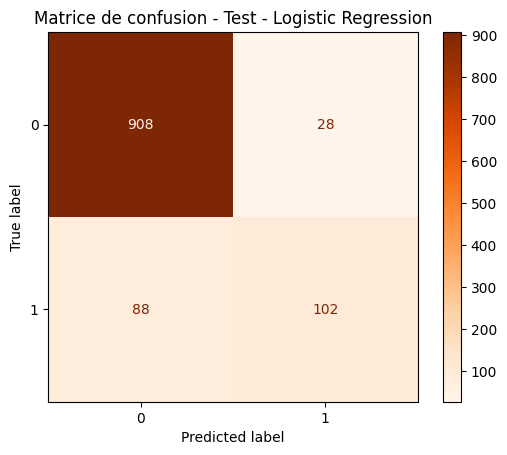

================ Decision Tree ================

📈 Résultats TRAIN - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00       758

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504



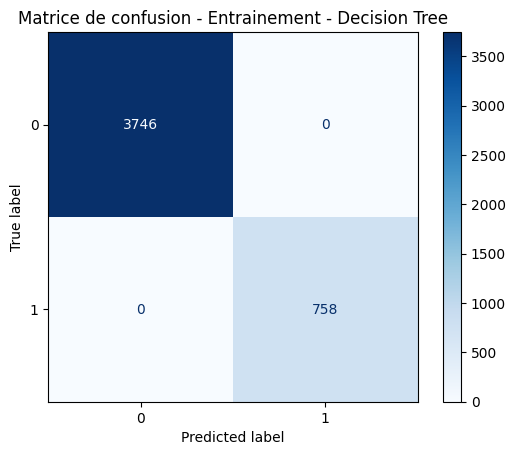


📊 Résultats TEST - Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       936
           1       0.93      0.92      0.92       190

    accuracy                           0.97      1126
   macro avg       0.95      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126



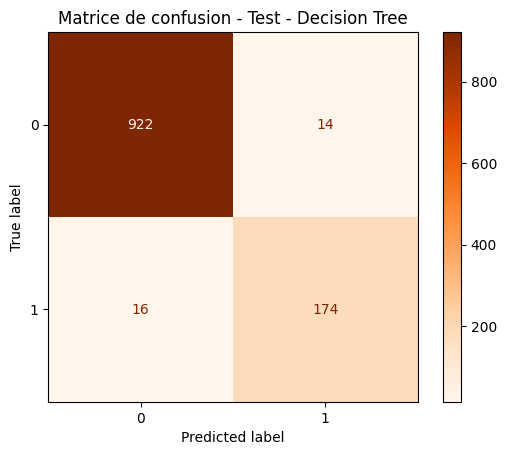

================ XGBoost ================

📈 Résultats TRAIN - XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00       758

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504



c:\Users\moussa.aouinane\Documents\Ecom\Score Churn Model\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


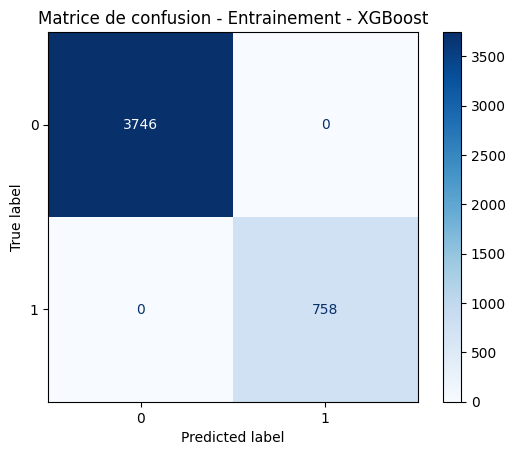


📊 Résultats TEST - XGBoost
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       936
           1       0.99      0.96      0.98       190

    accuracy                           0.99      1126
   macro avg       0.99      0.98      0.99      1126
weighted avg       0.99      0.99      0.99      1126



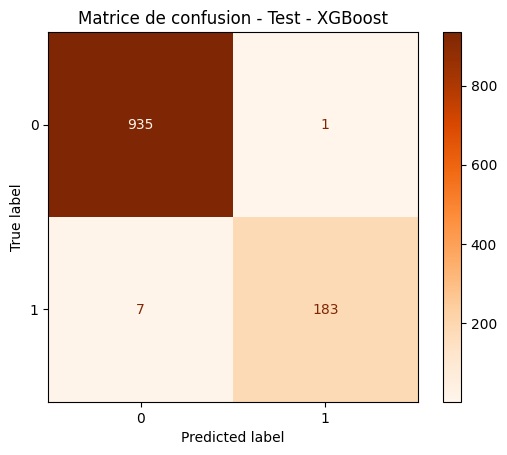

c:\Users\moussa.aouinane\Documents\Ecom\Score Churn Model\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\moussa.aouinane\Documents\Ecom\Score Churn Model\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\moussa.aouinane\Documents\Ecom\Score Churn Model\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\moussa.aouinane\Documents\Ecom\Score Churn Model\.venv\Lib\site-packages\xgboost\training.py:183: UserW

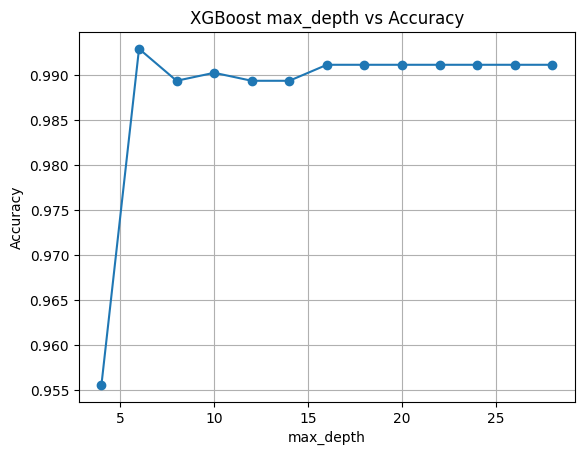

In [3]:
# 🔹 1. Logistic Regression
print("================ Logistic Regression ================")
log_model = train_and_test(X_train, y_train, X_test, y_test, LogisticRegression(solver='liblinear'), "Logistic Regression")

# 🔹 2. Decision Tree
print("================ Decision Tree ================")
dt_model = train_and_test(X_train, y_train, X_test, y_test, DecisionTreeClassifier(random_state=42), "Decision Tree")

# 🔹 3. XGBoost
print("================ XGBoost ================")
xgb_model = train_and_test(X_train, y_train, X_test, y_test, XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")

## 🧪 Hypertuning de XGBoost : max_depth

max_depth_range = range(4, 30, 2)
depth_scores = []
for depth in max_depth_range:
    clf = XGBClassifier(max_depth=depth, use_label_encoder=False, eval_metric='logloss')
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    depth_scores.append(acc)

plt.plot(max_depth_range, depth_scores, marker='o')
plt.title("XGBoost max_depth vs Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


## ✅ Modèle final avec paramètres optimisés

================ XGBoost (Tuned) ================


c:\Users\moussa.aouinane\Documents\Ecom\Score Churn Model\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📈 Résultats TRAIN - XGBoost (Tuned)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00       758

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504



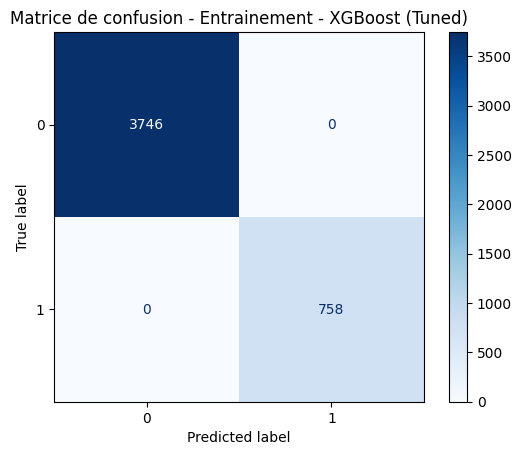


📊 Résultats TEST - XGBoost (Tuned)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       936
           1       0.99      0.96      0.97       190

    accuracy                           0.99      1126
   macro avg       0.99      0.98      0.98      1126
weighted avg       0.99      0.99      0.99      1126



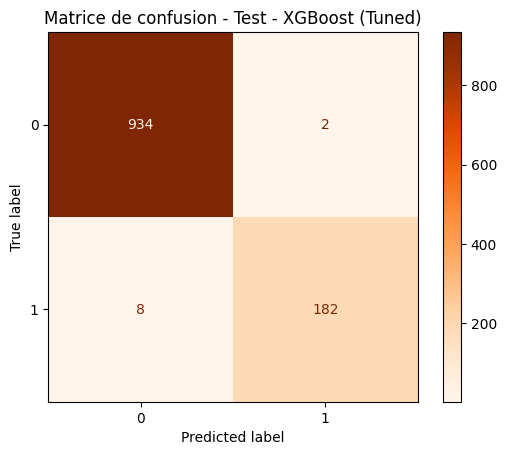

✅ Modèle XGBoost sauvegardé dans /models


In [4]:
print("================ XGBoost (Tuned) ================")
tuned_xgb = XGBClassifier(max_depth=16, eta=0.4, n_estimators=400, use_label_encoder=False, eval_metric='logloss')
final_model = train_and_test(X_train, y_train, X_test, y_test, tuned_xgb, "XGBoost (Tuned)")

## 💾 Sauvegarde du modèle final
os.makedirs("../models", exist_ok=True)
joblib.dump(final_model, "../models/churn_xgb_model.pkl")
print("✅ Modèle XGBoost sauvegardé dans /models")